# A quickstart of GraphEM

**Expected time to run through: 3 mins**

This tutorial demonstrates a quickstart of the GraphEM algorithm.

In [2]:
%load_ext autoreload
%autoreload 2

import GraphEM
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
np.set_printoptions(precision = 4) # set print forma

In [4]:
#Generate data
np.random.seed(42)
# Temperature
temp = np.random.rand(5,10).T   # 10 years, 5 grid points
target = np.copy(temp)
print("Original Temp:\n",temp)

temp[4:10,:] = np.nan  # Insert missing values after instrumental period

Original Temp:
 [[0.3745 0.0206 0.6119 0.6075 0.122 ]
 [0.9507 0.9699 0.1395 0.1705 0.4952]
 [0.732  0.8324 0.2921 0.0651 0.0344]
 [0.5987 0.2123 0.3664 0.9489 0.9093]
 [0.156  0.1818 0.4561 0.9656 0.2588]
 [0.156  0.1834 0.7852 0.8084 0.6625]
 [0.0581 0.3042 0.1997 0.3046 0.3117]
 [0.8662 0.5248 0.5142 0.0977 0.5201]
 [0.6011 0.4319 0.5924 0.6842 0.5467]
 [0.7081 0.2912 0.0465 0.4402 0.1849]]


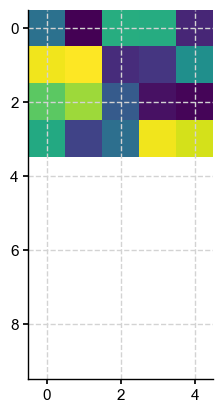

In [5]:
plt.imshow(temp)
plt.show()

In [7]:
# Proxies
proxy = np.random.rand(3,10).T # 10 years, 3 proxies

# calibration period
calib = range(0,4)
print("calib\n",calib)
G = GraphEM.solver.GraphEM()

calib
 range(0, 4)


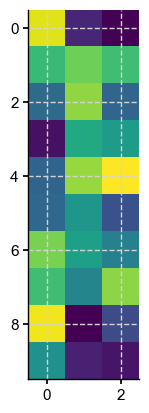

In [8]:
plt.imshow(proxy)
plt.show()

In [9]:
#Fit test
G.fit(temp,proxy,calib,sp_TT=3,sp_TP=3,sp_PP=3,graph_method = 'glasso')
temp_r = G.temp_r

Estimating graph using greedy search
Iter    TT      TP      PP

001  10.000   0.000   0.000
002  10.000   6.667   0.000
003  10.000   6.667   0.000
004  10.000   6.667   0.000
005  10.000   6.667   0.000
006  10.000   6.667   0.000
007  10.000   6.667  33.333
Running GraphEM:

Iter     dXmis     rdXmis

001     0.0466     0.0961
002     0.0456     0.0938
003     0.0181     0.0373
004     0.0164     0.0336
005     0.0148     0.0303
006     0.0128     0.0260
007     0.0104     0.0213
008     0.0082     0.0167
009     0.0062     0.0127
010     0.0046     0.0095
011     0.0034     0.0070
012     0.0025     0.0051
013     0.0018     0.0037


In [11]:
print("Computing verification statistics\n")
V = GraphEM.solver.verif_stats(temp_r,target,calib)
print(V)
print("temp:\n",temp)
print("temp_r",temp_r)
print("proxy:\n",proxy)

Computing verification statistics

Mean MSE = 0.1009, Mean RE = -0.1864, Mean CE = -0.8768, Mean R2 = nan
temp:
 [[0.3745 0.0206 0.6119 0.6075 0.122 ]
 [0.9507 0.9699 0.1395 0.1705 0.4952]
 [0.732  0.8324 0.2921 0.0651 0.0344]
 [0.5987 0.2123 0.3664 0.9489 0.9093]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan]]
temp_r [[0.3745 0.0206 0.6119 0.6075 0.122 ]
 [0.9507 0.9699 0.1395 0.1705 0.4952]
 [0.732  0.8324 0.2921 0.0651 0.0344]
 [0.5987 0.2123 0.3664 0.9489 0.9093]
 [0.8374 0.5088 0.2086 0.448  0.3902]
 [0.6357 0.5088 0.3786 0.448  0.3902]
 [0.6568 0.5088 0.3609 0.448  0.3902]
 [0.5875 0.5088 0.4193 0.448  0.3902]
 [0.2949 0.5088 0.666  0.448  0.3902]
 [0.3549 0.5088 0.6154 0.448  0.3902]]
proxy:
 [[0.8631 0.1196 0.0314]
 [0.6233 0.7132 0.6364]
 [0.3309 0.7608 0.3144]
 [0.0636 0.5613 0.5086]
 [0.311  0.771

/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


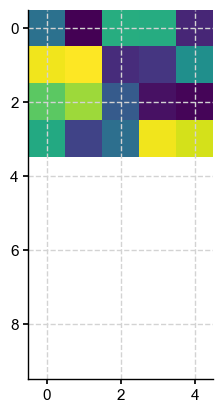

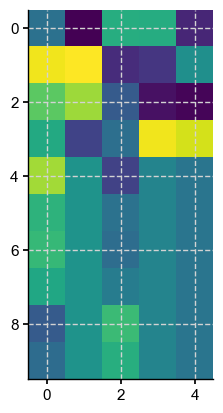

In [12]:
plt.imshow(temp)
plt.show()
plt.imshow(temp_r)
plt.show()